# Zomato Data Analysis Project

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
data =pd.read_csv('Zomato data .csv')
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [8]:
def handleRate(value):
    value =str(value).split('/')
    value =value[0];
    return float(value)
data['rate']=data['rate'].apply(handleRate)
print(data.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [11]:
#types of resturants
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Types  of resturant')

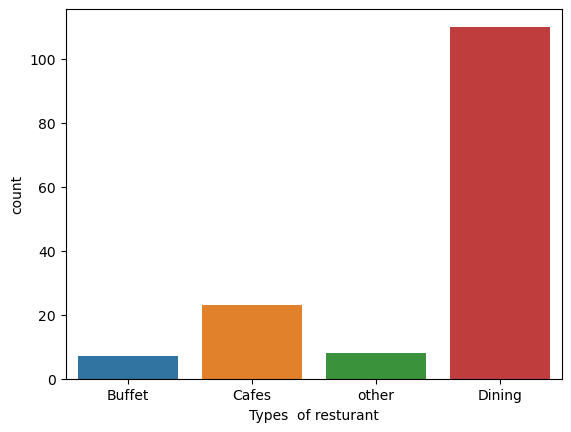

In [12]:
sns.countplot(x=data['listed_in(type)'])
plt.xlabel("Types  of resturant")

conclusion - majority of the resturant falls in dinning category

Text(0, 0.5, 'votes')

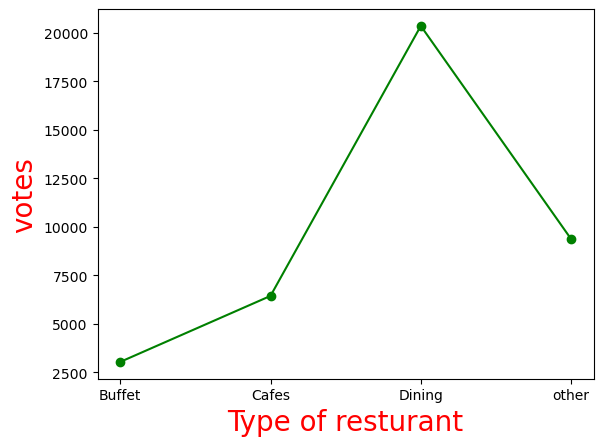

In [17]:
grouped = data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of resturant", c="red", size=20)
plt.ylabel("votes",c="red", size=20)

conclusion : Dinning resturants has recieved maxi votes

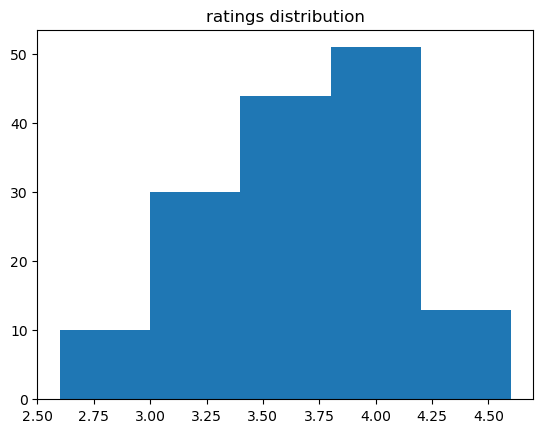

In [18]:
plt.hist(data['rate'], bins=5)
plt.title("ratings distribution")
plt.show()

conclusion: The maajority resturanrs received ratings from 3.5 to 4
    

In [19]:
#Average order spending by couples

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='count'>

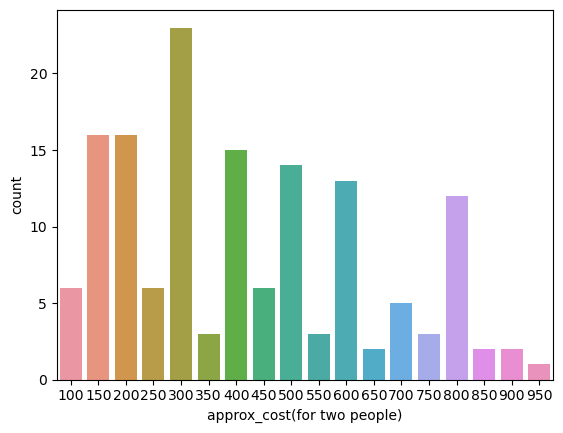

In [20]:
couple_data=data['approx_cost(for two people)']
sns.countplot(x=couple_data)

conclusion:The majority of couples preferr resturants with approxmate cost of 300 rupee

# which mode receives maxi rating

<AxesSubplot:xlabel='online_order', ylabel='rate'>

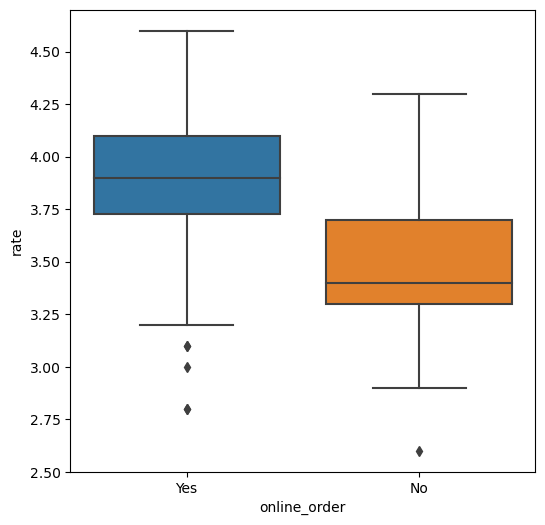

In [21]:
plt.figure(figsize =(6,6))
sns.boxplot(x= 'online_order', y='rate', data=data)

conclusion: Offline order received lower rating in comparion to online rating

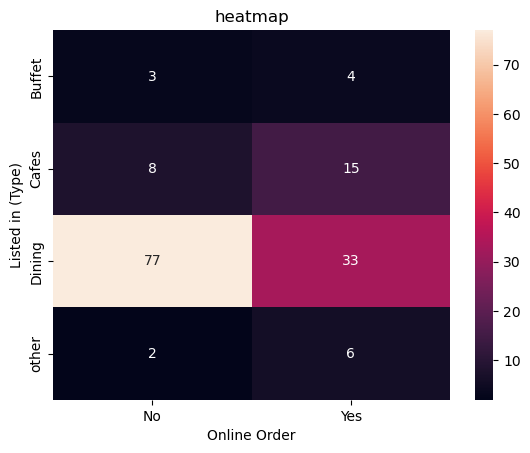

In [27]:
pivot_table =data.pivot_table(index='listed_in(type)', columns='online_order',aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d')
plt.title('heatmap')
plt.xlabel("Online Order")
plt.ylabel("Listed in (Type)")
plt.show()

Conclusion: dinning resturants primarily accept offline orders, where as cafes primarly
    receive online orders.this suggests that clients prefer orders in person at restaurant,
    but prefer online ordering at cafes.